In [2]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import roots_legendre

## Question 1 

In [3]:
def gaussian_quad(func , a , b , n): 
    x , w = roots_legendre(n)
    x = 0.5*(b-a)*x + 0.5*(a+b)
    w = 0.5*(b-a)*w
    
    return np.sum( w*func( x ) )

In [4]:
def H( x , n ): 
    if n == 0 : 
        return np.ones( x.size ) 
    elif n == 1 : 
        return 2*x 
    else: 
        return 2*x*H( x , n -1 ) - 2*(n-1)*H( x , n -2 )
# H = np.vectorize( H )
def psi( x , n ): 
    const = ( (2**n)*math.factorial(n)*math.sqrt( np.pi ))**(-0.5)
    return const * np.exp( -np.square( x )/2) * H( x , n )

In [5]:
x = np.linspace( -4 , 4 , 10000 )
y = np.zeros( ( 4 , x.size ))
for n in range( 4 ): 
    y[n , :  ] = psi( x , n )

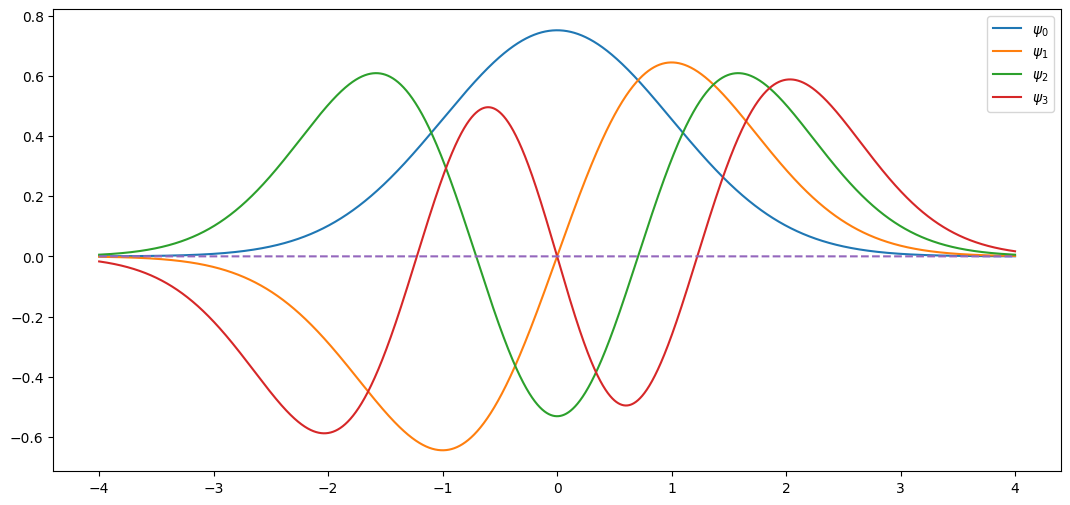

In [6]:
fig , ax = plt.subplots( figsize = ( 13 , 6 ))
n = 2
for n in range( 4 ):
    ax.plot( x , y[ n,:] , label = fr'$\psi_{{{n}}}$')
ax.plot( x , np.zeros( x.size ) , '--' )
plt.legend()
plt.show()

In [7]:
x = np.linspace( -10 , 10 , 1000 )
y = psi( x , 30 )

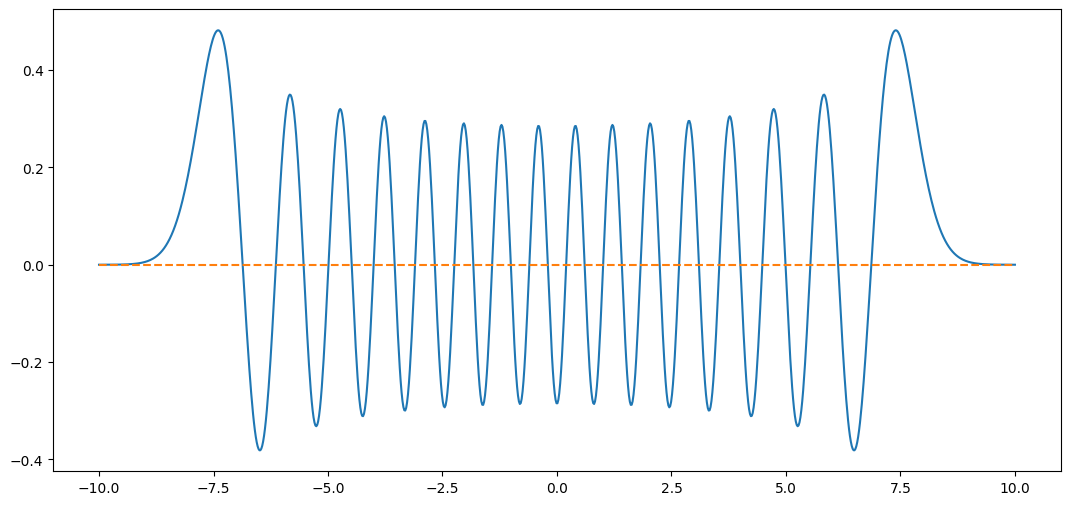

In [8]:
fig , ax = plt.subplots( figsize = ( 13 ,6 ))
plt.plot( x , y )
plt.plot( x , np.zeros( x.size ) , '--' )
plt.show()

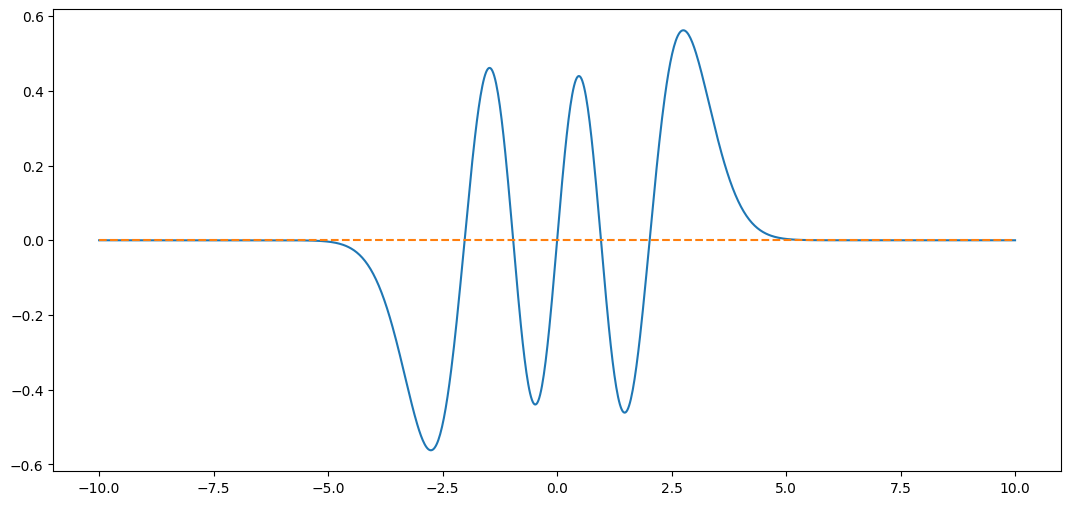

In [9]:
x = np.linspace( -10 , 10 , 1000 )
y = psi( x , 5 )
fig , ax = plt.subplots( figsize = ( 13 ,6 ))
plt.plot( x , y )
plt.plot( x , np.zeros( x.size ) , '--' )
plt.show()

In [10]:
n = 5 
func = lambda x : np.square( x*psi( x , n) )
print("<x^2> =" , gaussian_quad( func , -6 , 6 , 100 )**(0.5) )

<x^2> = 2.3452078775240057


## Question 2 

In [11]:
func = lambda x : np.cos( np.pi*x/2 )
for n in range( 2 , 11):
    print(f"ans (with n={n}) =" , gaussian_quad( func , -1 , 1 , n )**2)

ans (with n=2) = 1.518762970961183
ans (with n=3) = 1.623391342035904
ans (with n=4) = 1.6211133705169127
ans (with n=5) = 1.6211391170638603
ans (with n=6) = 1.6211389374299878
ans (with n=7) = 1.6211389382803059
ans (with n=8) = 1.621138938277396
ans (with n=9) = 1.6211389382774006
ans (with n=10) = 1.6211389382774068


## Question 3 

given $y(x) = 1 + \frac{1}{2}\tanh{2x}$
we have $y^{'}(x) = sech^{2}(2x)$

In [12]:
def centeral_diff( func , a, b , h, n ): 
    x = np.linspace( a + h , b - h , n  )
    yplus = func( x + h/2 )
    yminus = func( x - h/2 )
    result = ( yplus - yminus )/h 
    return result ,  x 

In [13]:
f = lambda x : 1 + 0.5*np.tanh( 2*x )
fprime = lambda x : 1/np.square( np.cosh( 2 * x ))
cdiff , x  = centeral_diff( f , -2 , 2 , 0.1 , 100 ) 
adiff = fprime( x )

cerror = math.sqrt( np.average( np.square( cdiff - adiff )))

print( 'rms diff  = ' ,  cerror  ) 

rms diff  =  0.0010471861540929117


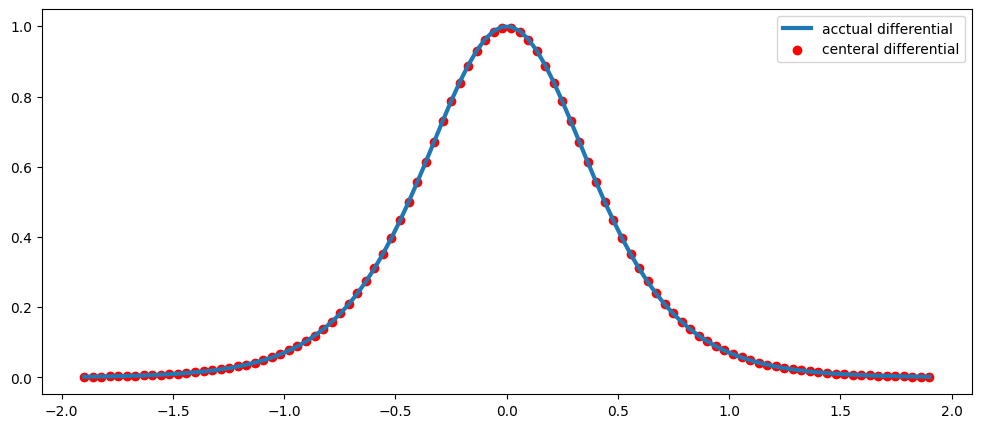

In [14]:
ax , fig = plt.subplots( figsize = ( 12 , 5 ))
plt.plot(  x, adiff , label = 'acctual differential', linewidth = 3 )
plt.scatter( x , cdiff , label = 'centeral differential' , color = 'r' )
# plt.scatter( x , cdiff )
plt.legend()
plt.show()

In [15]:
def forward_diff( func , a, b , h, n ): 
    x = np.linspace( a + h , b - h , n  )
    yplus = func( x + h )
    yminus = func( x  )
    result = ( yplus - yminus )/h 
    return result ,  x 

In [16]:
f = lambda x : 1 + 0.5*np.tanh( 2*x )
fprime = lambda x : 1/np.square( np.cosh( 2 * x ))
fdiff , x  = forward_diff( f , -2 , 2 , 0.1 , 100 ) 
adiff = fprime( x )

ferror = math.sqrt( np.average( np.square( fdiff - adiff )))

print( 'rms diff  = ' ,  ferror  ) 
print( ferror - cerror  )

rms diff  =  0.03715765709381399
0.03611047093972108


more error in forward differential method than centeral differential method ! 

we do our analysis at $ x = 0 $ 

In [17]:
acctual = fprime( 0 )
for h in [ 0.001 , 0.01 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.3 , 1.5 , 2 , 3 , 5 , 6,  9 , 10 , 12 , 20 , 25 , 30 , 40 ]: 
    fdiff = ( f(h) - f(0))/h 
    cdiff = ( f(h/2) - f(-h/2))/h
    ferror = abs( fdiff - acctual )
    cerror = abs( cdiff - acctual )
    ratio = ferror/cerror 
    print( f'for h = {h} , error in f = {ferror} , error in c = {cerror}, ratio = {ratio}')

for h = 0.001 , error in f = 1.3333311112972979e-06 , error in c = 3.3333313798067365e-07, ratio = 3.9999956781212767
for h = 0.01 , error in f = 0.00013331200345767513 , error in c = 3.333200005917192e-05, ratio = 3.9995200774335733
for h = 0.1 , error in f = 0.013123398875479975 , error in c = 0.0033200537504409766, ratio = 3.952766991720208
for h = 0.2 , error in f = 0.05012759436193748 , error in c = 0.013123398875479975, ratio = 3.8197112529740216
for h = 0.3 , error in f = 0.1049173883366078 , error in c = 0.02895795849469729, ratio = 3.6230934012775804
for h = 0.4 , error in f = 0.16995403716518886 , error in c = 0.05012759436193748, ratio = 3.3904287514390905
for h = 0.5 , error in f = 0.23840584404423515 , error in c = 0.07576568547998064, ratio = 3.1466203009174714
for h = 0.6 , error in f = 0.3052878274898705 , error in c = 0.1049173883366078, ratio = 2.9097924789207643
for h = 0.7 , error in f = 0.3676059655698124 , error in c = 0.13661746126119512, ratio = 2.69076853116891

c is still better than f but the ratio $\frac{\text{ferror}}{\text{cerror}}$ keeps on decreasing as h increases, which means that f is getting better or closer to c ! 

## Gaussian Quadrature ! 

In [18]:
def P( x , n ): 
    if n == 0 : 
        return np.ones( x.size )
    elif n == 1 : 
        return x 
    else: 
        return (1/n)*( (2*n-1)*x*P( x , n -1 ) - (n-1)*P(x , n -2 ))

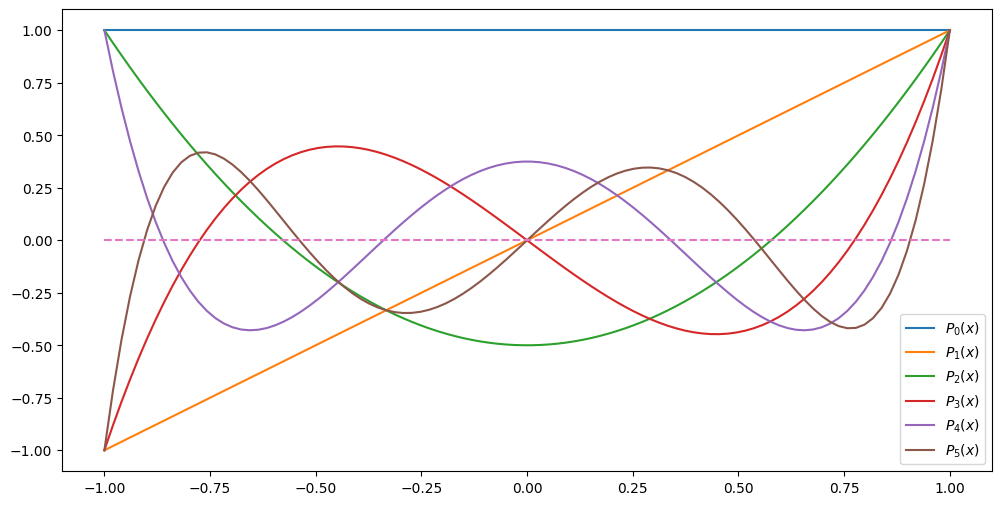

In [19]:
fig ,ax = plt.subplots( figsize = ( 12 , 6 ))
x = np.linspace( -1 , 1 , 100 )
for n in range(  6 ):
    plt.plot( x , P( x , n ), label = fr'$P_{{{n}}}(x)$')
plt.plot( x , np.zeros( x.size ) , '--')
plt.legend()
plt.show()

In [20]:
x = np.linspace( -1 , 1 , int( 1e4 ))
poly = P( x , 5 )
poly = np.delete( poly , 499 )
x = np.delete( x , 499 )
x =  x[ np.where( np.absolute(poly) <  2.3e-4) ] 
xsci , wsci = roots_legendre( 5 )
# print( xsci )
w = 2*np.divide( 1 - np.square( x ) ,  np.square((n+1)*P(x,n+1))  ) 
print( x , '\n' , xsci )
print( w , '\n' ,  wsci )

[-9.06190619e-01 -5.38553855e-01 -1.00010001e-04  1.00010001e-04
  5.38553855e-01  9.06190619e-01] 
 [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[0.23705629 0.47893593 0.56888912 0.56888912 0.47893593 0.23705629] 
 [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
